# Clustering

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall.csv")

In [3]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


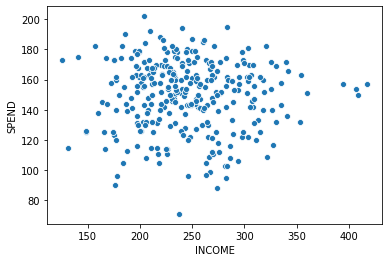

In [4]:
plt.figure()
sns.scatterplot(data = df,x="INCOME",y="SPEND")
plt.show()

## KMeans

In [5]:
from sklearn.cluster import KMeans

In [6]:
ke1 = KMeans(n_clusters = 3,n_init = 10,max_iter = 300 , random_state = 1)

In [7]:
ke1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [8]:
# WCSS - within cluster sum of square

In [9]:
ke1.inertia_

297101.3764201943

In [14]:
centroids = ke1.cluster_centers_

In [17]:
centroids_df = pd.DataFrame(centroids,columns=["X","Y"])

In [18]:
centroids_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


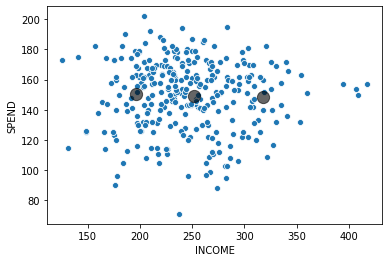

In [21]:
plt.figure()
sns.scatterplot(data = df,x="INCOME",y="SPEND")
plt.scatter(centroids_df["X"],centroids_df["Y"],c="black",s=150,alpha=0.6)
plt.show()

## K values and Elbow method

In [23]:
wcss = []

for k in range(1,30):
    ke2 = KMeans(n_clusters = k,n_init = 10,max_iter = 300 , random_state = 1)
    ke2.fit(df)
    wcss.append(ke2.inertia_)

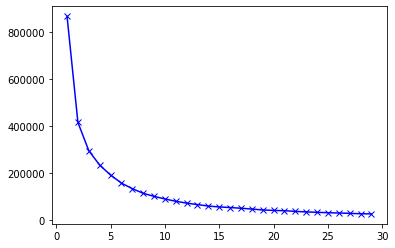

In [26]:
plt.figure()
plt.plot(range(1,30),wcss,'bx-')
plt.show()

## Final Model

In [27]:
ke3 = KMeans(n_clusters = 4,n_init = 10,max_iter = 300 , random_state = 1)

In [30]:
labels = ke3.fit_predict(df)   #fit - to train , fit_predict - to predict

In [32]:
labels = pd.DataFrame({"labels":labels})

In [35]:
labels.head()

,labels
0,0
1,0
2,2
3,0
4,1


In [38]:
df = pd.concat([df,labels],axis = 1)

In [39]:
df.head()

,INCOME,SPEND,labels
0,233,150,0
1,250,187,0
2,204,172,2
3,236,178,0
4,354,163,1


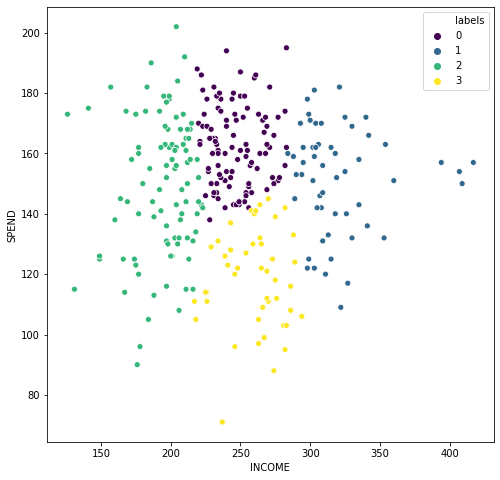

In [43]:
plt.figure(figsize= (8,8))
sns.scatterplot(data = df,x="INCOME",y="SPEND",hue="labels",palette = "viridis")
plt.show()